## Data preprocessing

The Titanic data is obtained from the kaggle website. This data is a part of a kaggle competition.

In [2]:
import pandas as pd

dataset=pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking how many NULL values are there under each data column field.

In [3]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


fillna fills the NaN values with a given number with which you want to substitute. It gives you an option to fill according to the index of rows of a pd.DataFrame or on the name of the columns in the form of a python dict. Inplace means it fills in the place of the old value. Here we choose to replace the NULL values with the mean of the column.

In [4]:
dataset.fillna(dataset.mean(), inplace=True)
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We hell don't care about the names and their tickets like Rose did'nt care about Jack's. So we drop the columns. Actually we could have done the NULL checking after dropping but i studied in Canara ..so we all do ulta palta things there.

In [5]:
dataset.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


We chose the Survival index as the target variable.So we kick it out from the dataset but keep it with us as a target variable for training our model.

In [6]:
inputs=dataset.drop('Survived',axis='columns')
target=dataset['Survived']
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


i'm pretty sure 0th one was Jack and 1st one is Rose. 2nd one is that a-hole Cal hockley.

In [7]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Our poor computer is not that advanced AI which will understand male and female., but we want that information. So what do we do?, We label encode it which means that encode all the male values to 1 and all the female values to 0. Feminazis thinking 0 is better than 1 or the other way around.

In [8]:
from sklearn.preprocessing import LabelEncoder

le_sex=LabelEncoder()

inputs['sex']=le_sex.fit_transform(inputs['Sex'])

inputs=inputs.drop(['Sex'],axis='columns')
inputs.head()

,Pclass,Age,Fare,sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


## Model Training

Before training the model we wish to split the data into training and testing datasets.

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2,random_state=0)

We are using a normal generic Decision Tree classifier to classify whether you survived or not..uh i mean the passanger survivied or not.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

model=DecisionTreeClassifier()
start=time.time()
model.fit(x_train,y_train)
stop=time.time()

y_pred=model.predict(x_test)
print("Time taken is : "+str((stop-start)*100)+" ms")
print("Accuracy of this model on the test set is : "+str(accuracy_score(y_test,y_pred)*100)+" %")

Time taken is : 13.640093803405762 ms
Accuracy of this model on the test set is : 81.56424581005587 %


In [12]:
def index2word(user_stat):
    if(user_stat==[0]):
        print("--------User status--------")
        print("RIP This User did not survive Titanic")
    else:
        print("--------User status--------")
        print("Congratulations..You made it!")
user1_status=model.predict([[3,22,5.044,1]])
index2word(user1_status)
user2_status=model.predict([[1,38.0,71.2833,0]])
index2word(user2_status)

--------User status--------
RIP This User did not survive Titanic
--------User status--------
Congratulations..You made it!


Using some ninja libraries and lot of web searching and copy pasting and editing environment variables..i finally present to you the visual representation of our generic decision tree classifer.

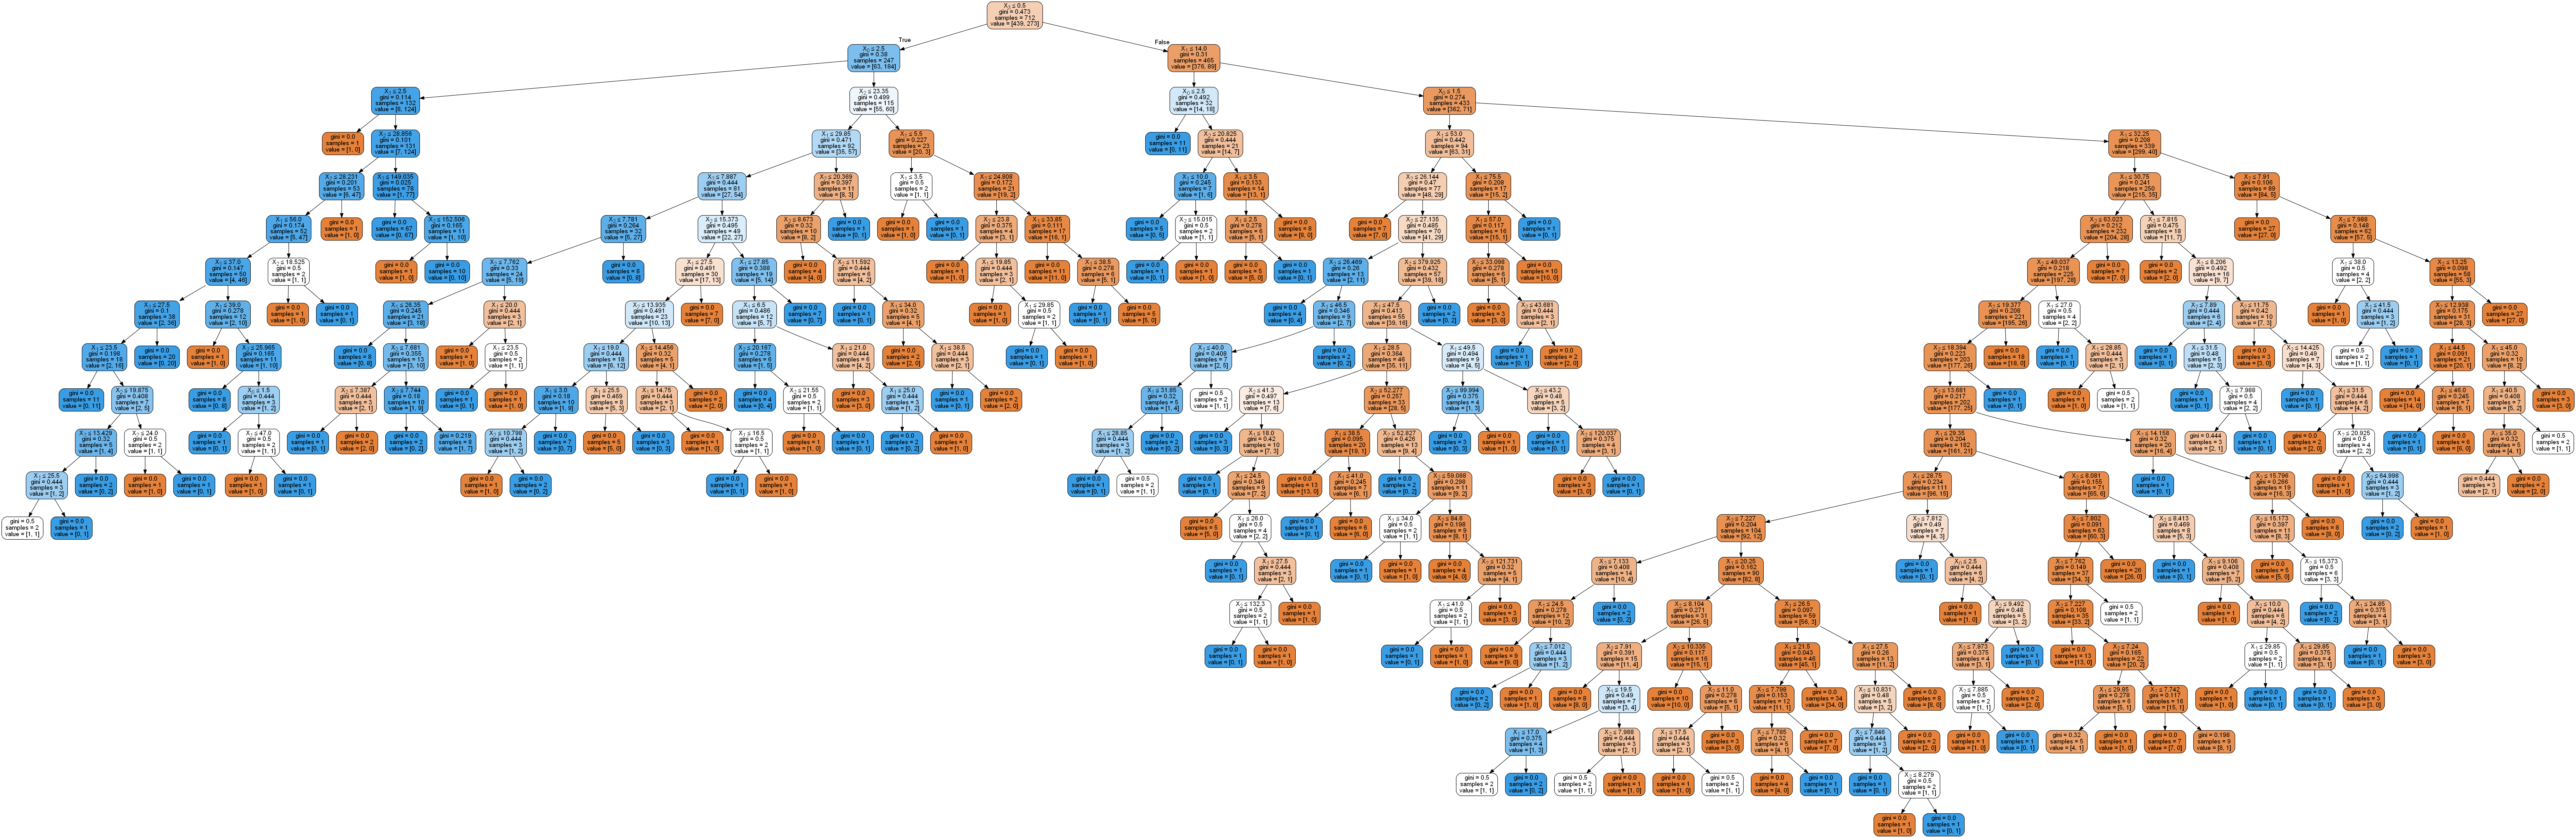

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())